File indexex in the list:  0
File indexex in the list:  3333
File indexex in the list:  6666


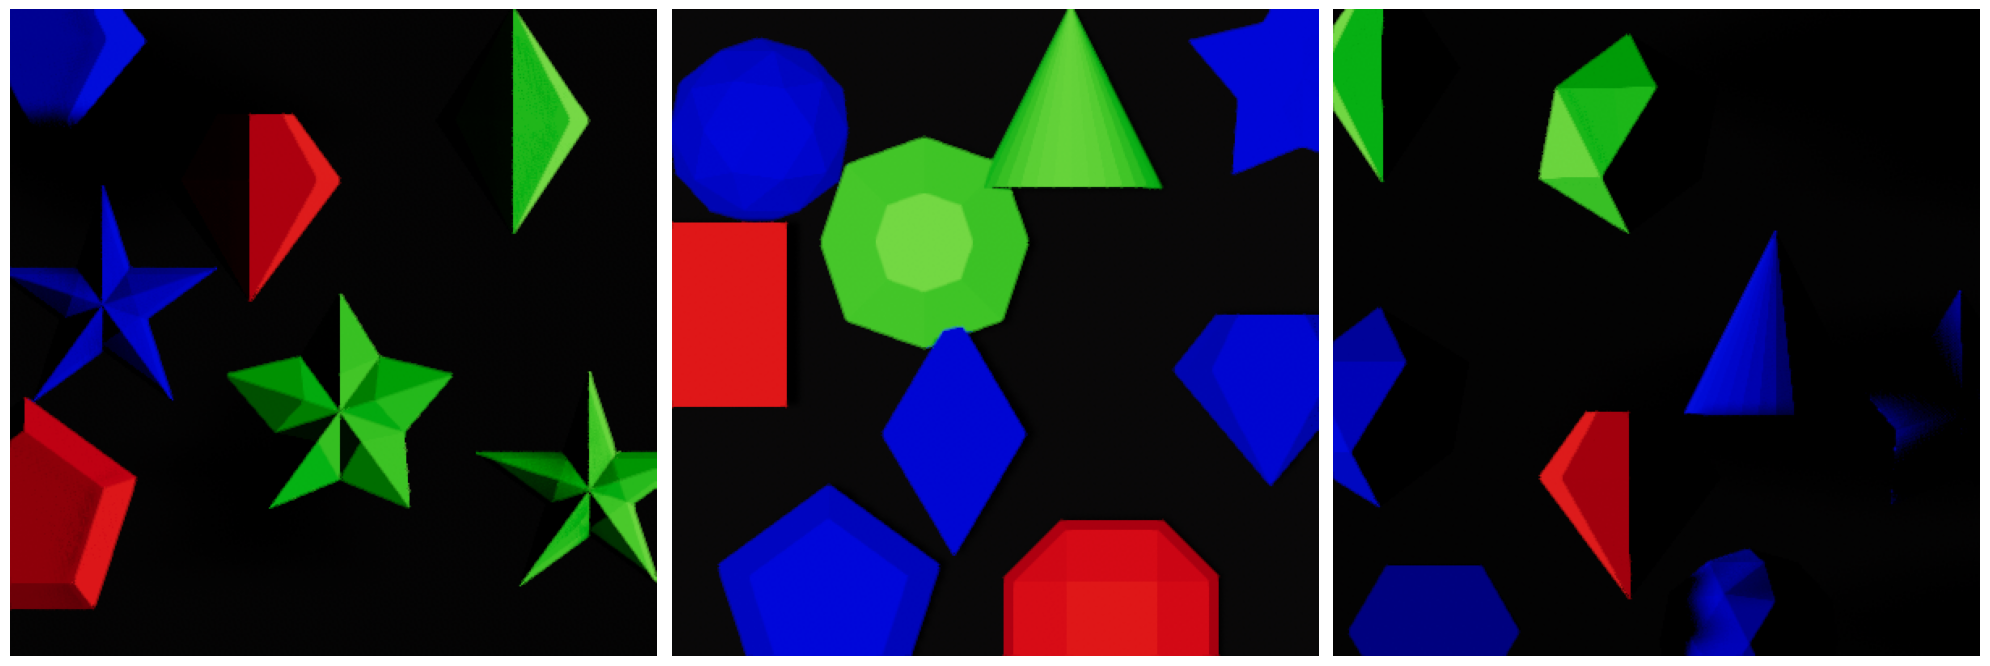

In [2]:
import PIL.Image as Image
import matplotlib.pyplot as plt
import os


light_angle_gems_data_path = r"..\..\UsefullnessOfDepth\datasets\SynthDet_rgb_light\RGB"

rgb_light_image_files = os.listdir(light_angle_gems_data_path)
rgb_light_image_files = sorted(rgb_light_image_files)
rgb_light_image_files = [os.path.join(light_angle_gems_data_path, image_file) for image_file in rgb_light_image_files if image_file.startswith("test")]

fig, ax = plt.subplots(1, 3, figsize=(20, 10))
# for i, image_file in image_files[::100]:
for i, image_file in enumerate(rgb_light_image_files[100:][::4500]):
    print("File indexex in the list: ", i * 3333)
    image = Image.open(image_file)
    ax[i].imshow(image)
    ax[i].axis('off')
plt.tight_layout()
plt.show()

NameError: name 'rgb_light_image_files' is not defined

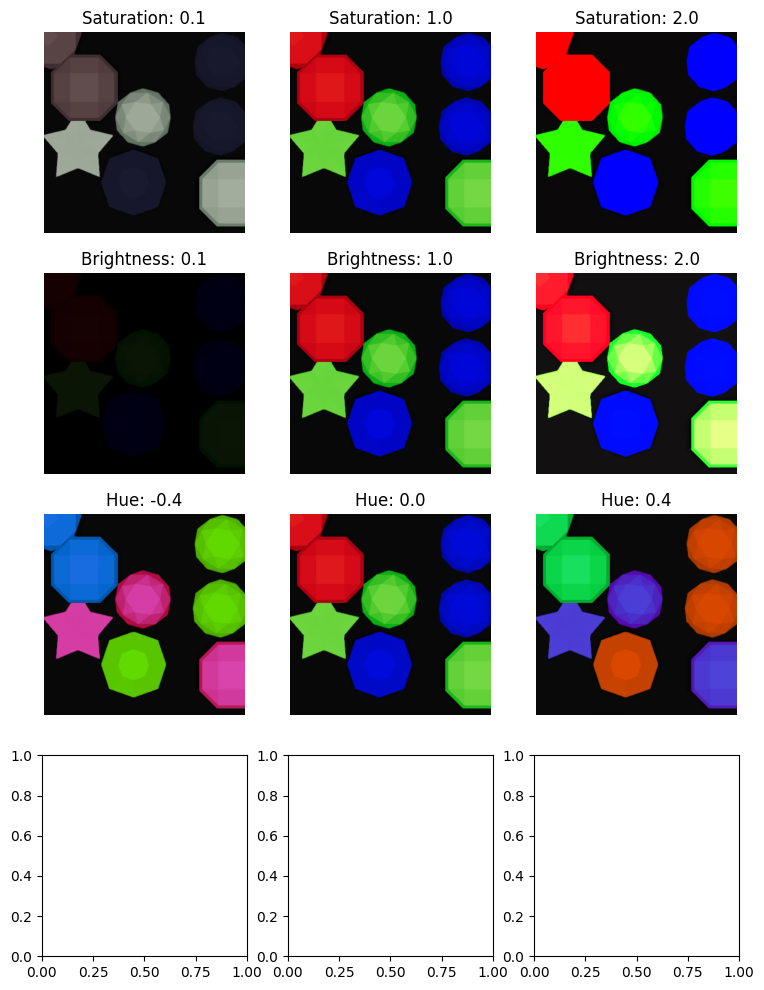

In [3]:
import PIL.Image as Image
import matplotlib.pyplot as plt
import os
import torchvision.transforms.functional as F


light_angle_gems_data_path = r"..\..\UsefullnessOfDepth\datasets\SynthDet_rgb\RGB"

image_files = os.listdir(light_angle_gems_data_path)
image_files = sorted(image_files)
image_files = [os.path.join(light_angle_gems_data_path, image_file) for image_file in image_files if image_file.startswith("test")]

saturation_values = [0.1, 1.0, 2.0]
brightness_values = [0.1, 1.0, 2.0]
hue_values = [-0.4, 0.0, 0.4]
light_angles = [-90, 0, 90]
fig, ax = plt.subplots(4, 3, figsize=(9, 12))
# for i, image_file in image_files[::100]:
image_file = image_files[0]
image = Image.open(image_file)
i = 0

for j, saturation in enumerate(saturation_values):
    saturation_adjusted_image = F.adjust_saturation(image, saturation)
    ax[i, j].imshow(saturation_adjusted_image)
    ax[i, j].axis('off')
    ax[i, j].set_title(f"Saturation: {saturation}")
for j, brightness in enumerate(brightness_values):
    brightness_adjusted_image = F.adjust_brightness(image, brightness)
    ax[i + 1, j].imshow(brightness_adjusted_image)
    ax[i + 1, j].axis('off')
    ax[i + 1, j].set_title(f"Brightness: {brightness}")
for j, hue in enumerate(hue_values):
    hue_adjusted_image = F.adjust_hue(image, hue)
    ax[i + 2, j].imshow(hue_adjusted_image)
    ax[i + 2, j].axis('off')
    ax[i + 2, j].set_title(f"Hue: {hue}")

for j, image_file in enumerate(rgb_light_image_files[100:][::4500]):
    image = Image.open(image_file)
    ax[i + 3, j].imshow(image)
    ax[i + 3, j].axis('off')
    ax[i + 3, j].set_title(f"Light angle: {light_angles[j]}")

plt.tight_layout()
plt.show()

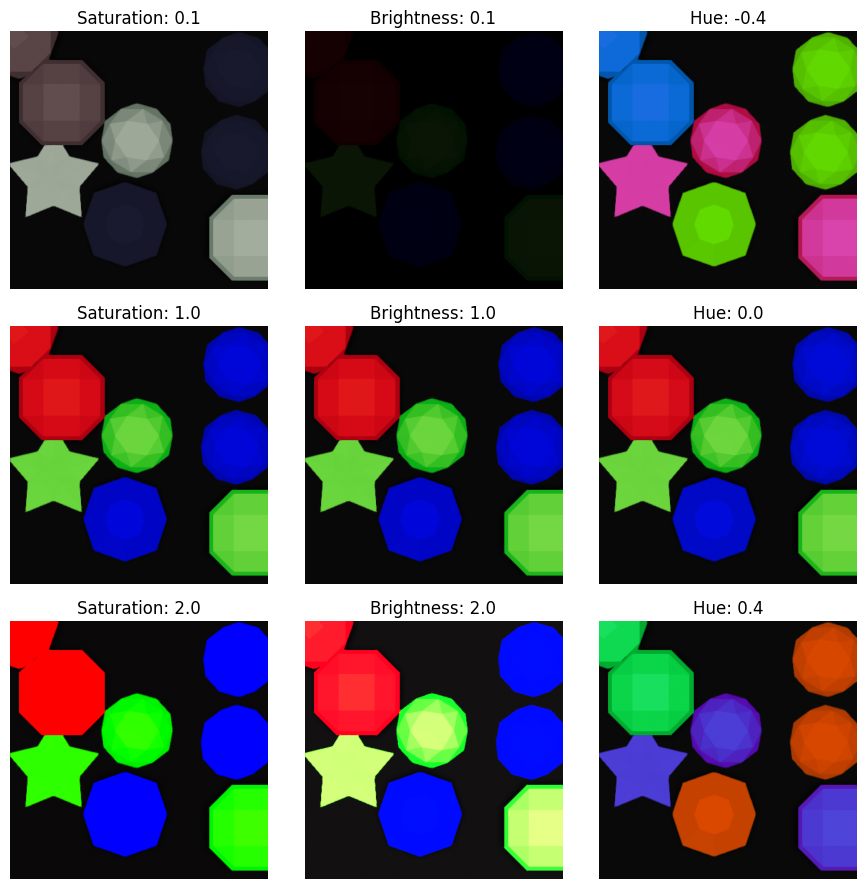

In [9]:
import matplotlib.pyplot as plt
from PIL import Image

saturation_values = [0.1, 1.0, 2.0]
brightness_values = [0.1, 1.0, 2.0]
hue_values = [-0.4, 0.0, 0.4]
light_angles = [-90, 0, 90]

# fig, ax = plt.subplots(3, 4, figsize=(12, 9))
fig, ax = plt.subplots(3, 3, figsize=(9, 9))

image_file = image_files[0]
image = Image.open(image_file)
i = 0

for j, saturation in enumerate(saturation_values):
    saturation_adjusted_image = F.adjust_saturation(image, saturation)
    ax[j, i].imshow(saturation_adjusted_image)
    ax[j, i].axis('off')
    ax[j, i].set_title(f"Saturation: {saturation}")

for j, brightness in enumerate(brightness_values):
    brightness_adjusted_image = F.adjust_brightness(image, brightness)
    ax[j, i + 1].imshow(brightness_adjusted_image)
    ax[j, i + 1].axis('off')
    ax[j, i + 1].set_title(f"Brightness: {brightness}")

for j, hue in enumerate(hue_values):
    hue_adjusted_image = F.adjust_hue(image, hue)
    ax[j, i + 2].imshow(hue_adjusted_image)
    ax[j, i + 2].axis('off')
    ax[j, i + 2].set_title(f"Hue: {hue}")

# for j, image_file in enumerate(rgb_light_image_files[100:][::4500]):
#     image = Image.open(image_file)
#     ax[j, i + 3].imshow(image)
#     ax[j, i + 3].axis('off')
#     ax[j, i + 3].set_title(f"Light angle: {light_angles[j]}")

plt.tight_layout()
plt.show()


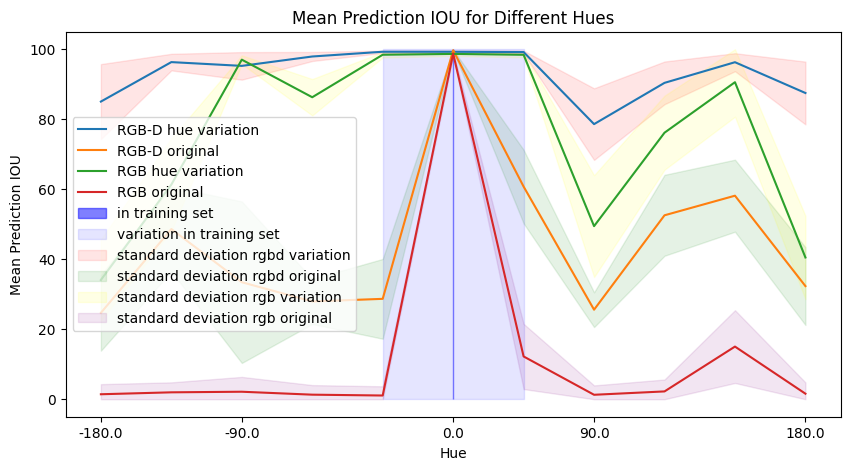

In [5]:
from result_analyzer import get_results_from_file
import numpy as np
import matplotlib.pyplot as plt

# code/UsefullnessOfDepth/checkpoints/SynthDet_rgb_DFormer-Tiny/run_20240505-204513_adjusted_hue_m01_01
hue_gems_rgbd_variation = r"..\checkpoints\SynthDet_rgb_DFormer-Tiny\run_20240505-204513_adjusted_hue_m01_01"
# code/UsefullnessOfDepth/checkpoints/SynthDet_rgb_DFormer-Tiny/run_20240503-102810
hue_gems_rgbd_original = r"..\checkpoints\SynthDet_rgb_DFormer-Tiny\run_20240503-102810_rgbd"
# code/UsefullnessOfDepth/checkpoints/SynthDet_rgb_DFormer-Tiny/run_20240505-212715_adjusted_hue_m01_01_rgb
hue_gems_rgb_variation = r"..\checkpoints\SynthDet_rgb_DFormer-Tiny\run_20240505-212715_adjusted_hue_m01_01_rgb"
# code\UsefullnessOfDepth\checkpoints\SynthDet_rgb_DFormer-Tiny\run_20240512-163425_rgb
hue_gems_rgb_original = r"..\checkpoints\SynthDet_rgb_DFormer-Tiny\run_20240512-163425_rgb"


# saturation_miou_rgbd_DFormer_tiny
hue_miou_rgbd_DFormer_tiny_variation, hue_iou_std_rgbd_DFormer_tiny_variation = get_results_from_file(hue_gems_rgbd_variation, results_file_name="hue_tests.txt")
hue_miou_rgbd_DFormer_tiny, hue_iou_std_rgbd_DFormer_tiny = get_results_from_file(hue_gems_rgbd_original, results_file_name="hue_tests.txt")
hue_miou_rgb_DFormer_tiny_variation, hue_iou_std_rgb_DFormer_tiny_variation = get_results_from_file(hue_gems_rgb_variation, results_file_name="hue_tests.txt")
hue_miou_rgb_DFormer_tiny, hue_iou_std_rgb_DFormer_tiny = get_results_from_file(hue_gems_rgb_original, results_file_name="hue_tests.txt")

hue_miou_rgbd_DFormer_tiny_variation = np.concatenate(np.array(hue_miou_rgbd_DFormer_tiny_variation))
hue_iou_std_rgbd_DFormer_tiny_variation = np.concatenate(np.array(hue_iou_std_rgbd_DFormer_tiny_variation))
hue_miou_rgbd_DFormer_tiny = np.concatenate(np.array(hue_miou_rgbd_DFormer_tiny))
hue_iou_std_rgbd_DFormer_tiny = np.concatenate(np.array(hue_iou_std_rgbd_DFormer_tiny))

hue_miou_rgb_DFormer_tiny_variation = np.concatenate(np.array(hue_miou_rgb_DFormer_tiny_variation))
hue_iou_std_rgb_DFormer_tiny_variation = np.concatenate(np.array(hue_iou_std_rgb_DFormer_tiny_variation))
hue_miou_rgb_DFormer_tiny = np.concatenate(np.array(hue_miou_rgb_DFormer_tiny))
hue_iou_std_rgb_DFormer_tiny = np.concatenate(np.array(hue_iou_std_rgb_DFormer_tiny))

x_label_degrees = np.linspace(-180, 180, 5)
x_labels = [str(x) for x in x_label_degrees]
plt.figure(figsize=(10, 5))
plt.plot(hue_miou_rgbd_DFormer_tiny_variation, label="RGB-D hue variation")
plt.plot(hue_miou_rgbd_DFormer_tiny, label="RGB-D original")
plt.plot(hue_miou_rgb_DFormer_tiny_variation, label="RGB hue variation")
plt.plot(hue_miou_rgb_DFormer_tiny, label="RGB original")


num_values = len(hue_miou_rgbd_DFormer_tiny_variation)
data_in_train_x_positions = np.array([0.0])
data_in_train_x_positions = (data_in_train_x_positions - (-0.5)) / (0.5- (-0.5)) * (num_values - 1)
plt.fill_between(
    [data_in_train_x_positions[0], data_in_train_x_positions[0]],
    0, 100,
    color='blue', alpha=0.5, label='in training set')


data_in_train_x_positions_variation = np.array([-0.1, 0.1])
data_in_train_x_positions_variation = (data_in_train_x_positions_variation - (-0.5)) / (0.5- (-0.5)) * (num_values - 1)
plt.fill_between(
    [data_in_train_x_positions_variation[0], data_in_train_x_positions_variation[1]],
    0, 100,
    color='blue', alpha=0.1, label='variation in training set')

plt.fill_between(
    range(len(hue_miou_rgbd_DFormer_tiny_variation)),
    np.maximum(hue_miou_rgbd_DFormer_tiny_variation - hue_iou_std_rgbd_DFormer_tiny_variation, 0),
    np.minimum(hue_miou_rgbd_DFormer_tiny_variation + hue_iou_std_rgbd_DFormer_tiny_variation, 100),
    color='red', alpha=0.1, label='standard deviation rgbd variation')

plt.fill_between(
    range(len(hue_miou_rgbd_DFormer_tiny)),
    np.maximum(hue_miou_rgbd_DFormer_tiny - hue_iou_std_rgbd_DFormer_tiny, 0),
    np.minimum(hue_miou_rgbd_DFormer_tiny + hue_iou_std_rgbd_DFormer_tiny, 100),
    color='green', alpha=0.1, label='standard deviation rgbd original')

plt.fill_between(
    range(len(hue_miou_rgb_DFormer_tiny_variation)),
    np.maximum(hue_miou_rgb_DFormer_tiny_variation - hue_iou_std_rgb_DFormer_tiny_variation, 0),
    np.minimum(hue_miou_rgb_DFormer_tiny_variation + hue_iou_std_rgb_DFormer_tiny_variation, 100),
    color='yellow', alpha=0.1, label='standard deviation rgb variation')

plt.fill_between(
    range(len(hue_miou_rgb_DFormer_tiny)),
    np.maximum(hue_miou_rgb_DFormer_tiny - hue_iou_std_rgb_DFormer_tiny, 0),
    np.minimum(hue_miou_rgb_DFormer_tiny + hue_iou_std_rgb_DFormer_tiny, 100),
    color='purple', alpha=0.1, label='standard deviation rgb original')    

plt.title("Mean Prediction IOU for Different Hues")
plt.xlabel("Hue")
plt.ylabel("Mean Prediction IOU")
plt.xticks(np.linspace(0, len(hue_miou_rgbd_DFormer_tiny_variation) -1, len(x_labels), dtype=int), x_labels)
plt.legend()
plt.show()

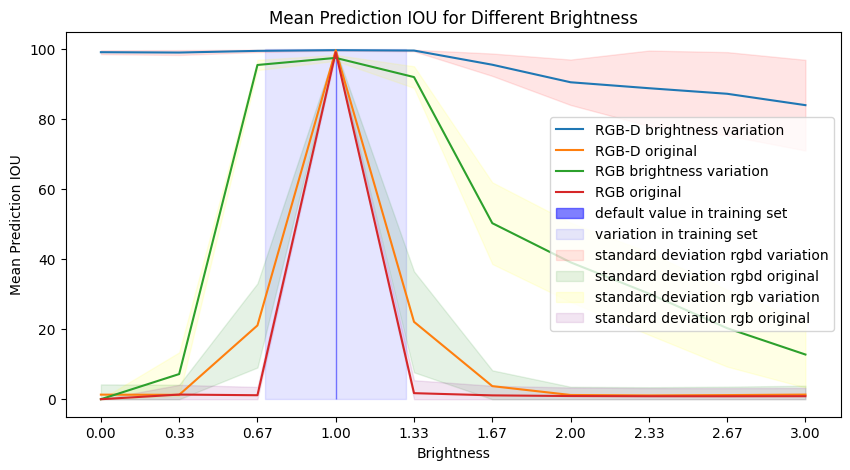

In [6]:
from result_analyzer import get_results_from_file
import numpy as np
import matplotlib.pyplot as plt

# code\UsefullnessOfDepth\checkpoints\SynthDet_saturation_rgb_DFormer-Tiny\run_20240505-193051_adjusted_brightness_07_13
brightness_gems_rgbd_variation = r"..\checkpoints\SynthDet_rgb_DFormer-Tiny\run_20240505-193051_adjusted_brightness_07_13"
# code\UsefullnessOfDepth\checkpoints\SynthDet_saturation_rgb_DFormer-Tiny\run_20240503-102810
brightness_gems_rgbd_original = r"..\checkpoints\SynthDet_rgb_DFormer-Tiny\run_20240503-102810_rgbd"
# code\UsefullnessOfDepth\checkpoints\SynthDet_rgb_DFormer-Tiny\run_20240512-005658_adjusted_brightness_07_13_rgb
brightness_gems_rgb_variation = r"..\checkpoints\SynthDet_rgb_DFormer-Tiny\run_20240512-005658_adjusted_brightness_07_13_rgb"
# code\UsefullnessOfDepth\checkpoints\SynthDet_rgb_DFormer-Tiny\run_20240512-163425_rgb
brightness_gems_rgb_original = r"..\checkpoints\SynthDet_rgb_DFormer-Tiny\run_20240512-163425_rgb"


brightness_miou_rgbd_DFormer_tiny_variation, brightness_iou_std_rgbd_DFormer_tiny_variation = get_results_from_file(brightness_gems_rgbd_variation, results_file_name="brightness_tests.txt")
brightness_miou_rgbd_DFormer_tiny, brightness_iou_std_rgbd_DFormer_tiny = get_results_from_file(brightness_gems_rgbd_original, results_file_name="brightness_tests.txt")
brightness_miou_rgb_DFormer_tiny_variation, brightness_iou_std_rgb_DFormer_tiny_variation = get_results_from_file(brightness_gems_rgb_variation, results_file_name="brightness_tests.txt")
brightness_miou_rgb_DFormer_tiny, brightness_iou_std_rgb_DFormer_tiny = get_results_from_file(brightness_gems_rgb_original, results_file_name="brightness_tests.txt")

brightness_miou_rgbd_DFormer_tiny_variation = np.concatenate(np.array(brightness_miou_rgbd_DFormer_tiny_variation))
brightness_iou_std_rgbd_DFormer_tiny_variation = np.concatenate(np.array(brightness_iou_std_rgbd_DFormer_tiny_variation))
brightness_miou_rgbd_DFormer_tiny = np.concatenate(np.array(brightness_miou_rgbd_DFormer_tiny))
brightness_iou_std_rgbd_DFormer_tiny = np.concatenate(np.array(brightness_iou_std_rgbd_DFormer_tiny))

brightness_miou_rgb_DFormer_tiny_variation = [[0] if not sublist else sublist for sublist in brightness_miou_rgb_DFormer_tiny_variation]
brightness_miou_rgb_DFormer_tiny_variation = np.concatenate(np.array(brightness_miou_rgb_DFormer_tiny_variation))
brightness_iou_std_rgb_DFormer_tiny_variation = [[0] if not sublist else sublist for sublist in brightness_iou_std_rgb_DFormer_tiny_variation]
brightness_iou_std_rgb_DFormer_tiny_variation = np.concatenate(np.array(brightness_iou_std_rgb_DFormer_tiny_variation))
brightness_miou_rgb_DFormer_tiny = [[0] if not sublist else sublist for sublist in brightness_miou_rgb_DFormer_tiny]
brightness_miou_rgb_DFormer_tiny = np.concatenate(np.array(brightness_miou_rgb_DFormer_tiny))
brightness_iou_std_rgb_DFormer_tiny = [[0] if not sublist else sublist for sublist in brightness_iou_std_rgb_DFormer_tiny]
brightness_iou_std_rgb_DFormer_tiny = np.concatenate(np.array(brightness_iou_std_rgb_DFormer_tiny))


x_label_degrees = np.linspace(0, 3.0, 10)
x_labels = [str(x) for x in x_label_degrees]
plt.figure(figsize=(10, 5))
plt.plot(brightness_miou_rgbd_DFormer_tiny_variation, label="RGB-D brightness variation")
plt.plot(brightness_miou_rgbd_DFormer_tiny, label="RGB-D original")
plt.plot(brightness_miou_rgb_DFormer_tiny_variation, label="RGB brightness variation")
plt.plot(brightness_miou_rgb_DFormer_tiny, label="RGB original")

num_values = len(brightness_miou_rgbd_DFormer_tiny_variation)
data_in_train_x_positions = np.array([1.0])
data_in_train_x_positions = (data_in_train_x_positions - 0) / (3.0 - 0.0) * (num_values - 1)
plt.fill_between(
    [data_in_train_x_positions[0], data_in_train_x_positions[0]],
    0, 100,
    color='blue', alpha=0.5, label='default value in training set')

data_in_train_x_positions_variation = np.array([0.7, 1.3])
data_in_train_x_positions_variation = (data_in_train_x_positions_variation - 0) / (3.0 - 0.0) * (num_values - 1)
plt.fill_between(
    [data_in_train_x_positions_variation[0], data_in_train_x_positions_variation[1]],
    0, 100,
    color='blue', alpha=0.1, label='variation in training set')

plt.fill_between(
    range(len(brightness_miou_rgbd_DFormer_tiny_variation)),
    np.maximum(brightness_miou_rgbd_DFormer_tiny_variation - brightness_iou_std_rgbd_DFormer_tiny_variation, 0),
    np.minimum(brightness_miou_rgbd_DFormer_tiny_variation + brightness_iou_std_rgbd_DFormer_tiny_variation, 100),
    color='red', alpha=0.1, label='standard deviation rgbd variation')

plt.fill_between(
    range(len(brightness_miou_rgbd_DFormer_tiny)),
    np.maximum(brightness_miou_rgbd_DFormer_tiny - brightness_iou_std_rgbd_DFormer_tiny, 0),
    np.minimum(brightness_miou_rgbd_DFormer_tiny + brightness_iou_std_rgbd_DFormer_tiny, 100),
    color='green', alpha=0.1, label='standard deviation rgbd original')

plt.fill_between(
    range(len(brightness_miou_rgb_DFormer_tiny_variation)),
    np.maximum(brightness_miou_rgb_DFormer_tiny_variation - brightness_iou_std_rgb_DFormer_tiny_variation, 0),
    np.minimum(brightness_miou_rgb_DFormer_tiny_variation + brightness_iou_std_rgb_DFormer_tiny_variation, 100),
    color='yellow', alpha=0.1, label='standard deviation rgb variation')

plt.fill_between(
    range(len(brightness_miou_rgb_DFormer_tiny)),
    np.maximum(brightness_miou_rgb_DFormer_tiny - brightness_iou_std_rgb_DFormer_tiny, 0),
    np.minimum(brightness_miou_rgb_DFormer_tiny + brightness_iou_std_rgb_DFormer_tiny, 100),
    color='purple', alpha=0.1, label='standard deviation rgb original')



plt.title("Mean Prediction IOU for Different Brightness")
plt.xlabel("Brightness")
plt.ylabel("Mean Prediction IOU")
# plt.xticks(np.linspace(0, len(miou_rgb_values_brightness_gems_rgbd_variation) -1, len(x_labels), dtype=int), x_labels)
# Convert to string with .2f
plt.xticks(np.linspace(0, len(brightness_miou_rgbd_DFormer_tiny_variation) -1, len(x_labels), dtype=int), [f"{label:.2f}" for label in x_label_degrees])
plt.legend()
plt.show()

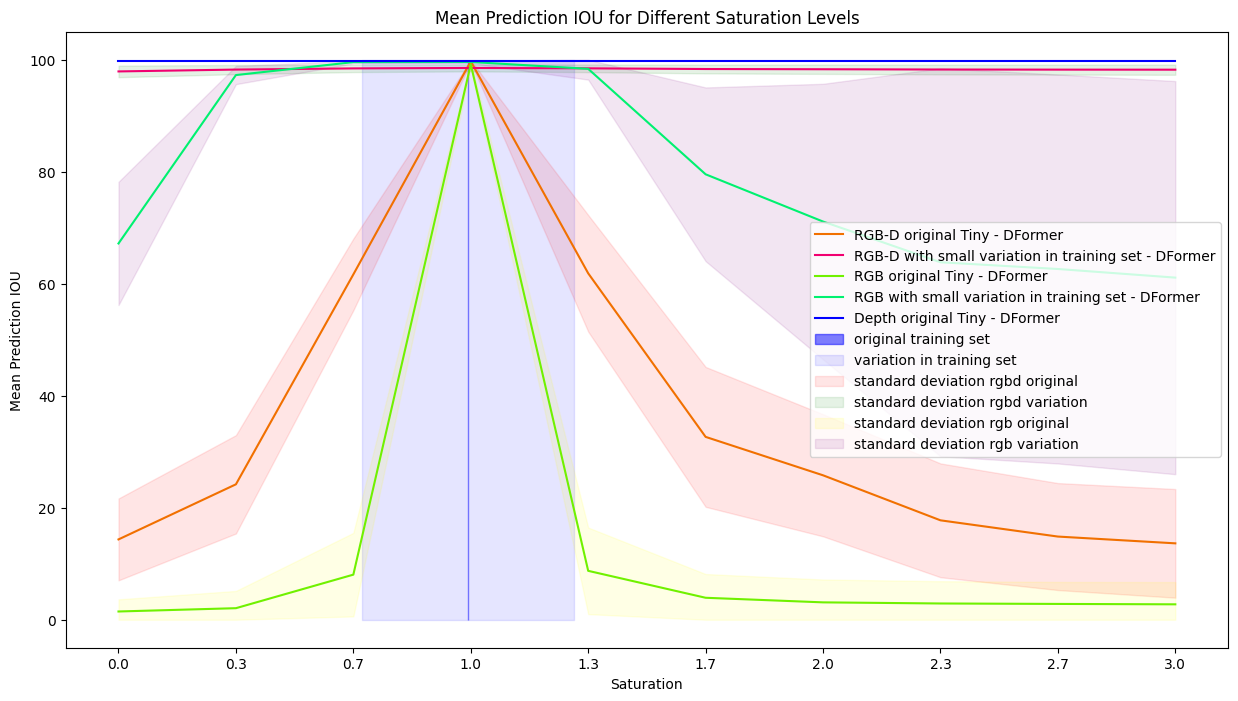

In [7]:
from result_analyzer import get_results_from_file
import numpy as np
import matplotlib.pyplot as plt

# code\UsefullnessOfDepth\checkpoints\SynthDet_saturation_rgb_DFormer-Tiny\run_20240503-102810
saturation_rgbd_DFormer_tiny = r"..\checkpoints\SynthDet_rgb_DFormer-Tiny\run_20240503-102810_rgbd"
# code/UsefullnessOfDepth/checkpoints/SynthDet_rgb_DFormer-Tiny/run_20240503-114722_adjusted_saturation_07_13
saturation_rgbd_DFormer_tiny_variation = r"..\checkpoints\SynthDet_rgb_DFormer-Tiny\run_20240503-114722_adjusted_saturation_07_13"

# code\UsefullnessOfDepth\checkpoints\SynthDet_rgb_DFormer-Tiny\run_20240512-163425_rgb
saturation_miou_rgb_DFormer_tiny = r"..\checkpoints\SynthDet_rgb_DFormer-Tiny\run_20240512-163425_rgb"
# code\UsefullnessOfDepth\checkpoints\SynthDet_rgb_DFormer-Tiny\run_20240512-093617_adjusted_saturation_07_13_rgb
saturation_miou_rgb_DFormer_tiny_variation = r"..\checkpoints\SynthDet_rgb_DFormer-Tiny\run_20240512-093617_adjusted_saturation_07_13_rgb"

# code\UsefullnessOfDepth\checkpoints\SynthDet_rgb_DFormer-Tiny\run_20240512-211303_depth
miou_depth_DFormer_tiny = r"..\checkpoints\SynthDet_rgb_DFormer-Tiny\run_20240512-211303_depth"



saturation_miou_rgbd_DFormer_tiny, saturation_std_rgbd_DFormer_tiny = get_results_from_file(saturation_rgbd_DFormer_tiny, results_file_name="saturation_tests.txt")
saturation_miou_rgbd_DFormer_tiny_variation, saturation_std_rgbd_DFormer_tiny_variation = get_results_from_file(saturation_rgbd_DFormer_tiny_variation, results_file_name="saturation_tests.txt")
saturation_miou_rgb_DFormer_tiny, saturation_std_rgb_DFormer_tiny = get_results_from_file(saturation_miou_rgb_DFormer_tiny, results_file_name="saturation_tests.txt")
saturation_miou_rgb_DFormer_tiny_variation, saturation_std_rgb_DFormer_tiny_variation = get_results_from_file(saturation_miou_rgb_DFormer_tiny_variation, results_file_name="saturation_tests.txt")

miou_depth_DFormer_tiny, std_depth_DFormer_tiny = get_results_from_file(miou_depth_DFormer_tiny, results_file_name="results.txt")

saturation_miou_rgbd_DFormer_tiny = np.concatenate(np.array(saturation_miou_rgbd_DFormer_tiny))
saturation_std_rgbd_DFormer_tiny = np.concatenate(np.array(saturation_std_rgbd_DFormer_tiny))
saturation_miou_rgbd_DFormer_tiny_variation = np.concatenate(np.array(saturation_miou_rgbd_DFormer_tiny_variation))
saturation_std_rgbd_DFormer_tiny_variation = np.concatenate(np.array(saturation_std_rgbd_DFormer_tiny_variation))

saturation_miou_rgb_DFormer_tiny = np.concatenate(np.array(saturation_miou_rgb_DFormer_tiny))
saturation_std_rgb_DFormer_tiny = np.concatenate(np.array(saturation_std_rgb_DFormer_tiny))
saturation_miou_rgb_DFormer_tiny_variation = np.concatenate(np.array(saturation_miou_rgb_DFormer_tiny_variation))
saturation_std_rgb_DFormer_tiny_variation = np.concatenate(np.array(saturation_std_rgb_DFormer_tiny_variation))

miou_depth_DFormer_tiny = np.concatenate(np.array(miou_depth_DFormer_tiny))
std_depth_DFormer_tiny = np.concatenate(np.array(std_depth_DFormer_tiny))

num_values = len(saturation_miou_rgb_DFormer_tiny)
colors = ['#FF69B4', 'green', 'blue']
rgb_colors = ['#70F100', '#00F170']
rgbd_colors = ['#F17000', '#F10070']
depth_colors = ['blue']
min_saturation = 0.01
max_saturation = 3.0
x_labels = np.linspace(min_saturation, max_saturation, num_values)
x_labels = [f"{label:.1f}" for label in x_labels]

plt.figure(figsize=(15, 8))
# plt.plot(saturation_miou_rgb_DFormer_tiny, label='RGB-D original Tiny - DFormer', color=rgb_colors[0])
# plt.plot(saturation_miou_rgb_DFormer_tiny_variation, label='RGB-D with small variation in training set - DFormer', color=rgb_colors[1])
plt.plot(saturation_miou_rgbd_DFormer_tiny, label='RGB-D original Tiny - DFormer', color=rgbd_colors[0])
plt.plot(saturation_miou_rgbd_DFormer_tiny_variation, label='RGB-D with small variation in training set - DFormer', color=rgbd_colors[1])
plt.plot(saturation_miou_rgb_DFormer_tiny, label='RGB original Tiny - DFormer', color=rgb_colors[0])
plt.plot(saturation_miou_rgb_DFormer_tiny_variation, label='RGB with small variation in training set - DFormer', color=rgb_colors[1])

plt.plot(np.repeat(miou_depth_DFormer_tiny, len(saturation_miou_rgbd_DFormer_tiny)), label='Depth original Tiny - DFormer', color=depth_colors[0])


data_in_train_x_positions = np.array([1.0])
data_in_train_x_positions = (data_in_train_x_positions - 0.01) / (3.0-0.01) * (num_values - 1)
plt.fill_between(
    [data_in_train_x_positions[0], data_in_train_x_positions[0]],
    0, 100,
    color='blue', alpha=0.5, label='original training set')

data_in_train_x_positions_variation = np.array([0.7, 1.3])
data_in_train_x_positions_variation = (data_in_train_x_positions_variation - 0.01) / (3.0-0.01) * (num_values - 1)
plt.fill_between(
    [data_in_train_x_positions_variation[0], data_in_train_x_positions_variation[1]],
    0, 100,
    color='blue', alpha=0.1, label='variation in training set')

plt.fill_between(
    range(len(saturation_miou_rgbd_DFormer_tiny)),
    np.maximum(np.array(saturation_miou_rgbd_DFormer_tiny) - np.array(saturation_std_rgbd_DFormer_tiny), 0),
    np.minimum(np.array(saturation_miou_rgbd_DFormer_tiny) + np.array(saturation_std_rgbd_DFormer_tiny), 100),
    color='red', alpha=0.1, label='standard deviation rgbd original')

plt.fill_between(
    range(len(saturation_miou_rgbd_DFormer_tiny_variation)),
    np.maximum(np.array(saturation_miou_rgbd_DFormer_tiny_variation) - np.array(saturation_std_rgbd_DFormer_tiny_variation), 0),
    np.minimum(np.array(saturation_miou_rgbd_DFormer_tiny_variation) + np.array(saturation_std_rgbd_DFormer_tiny_variation), 100),
    color='green', alpha=0.1, label='standard deviation rgbd variation')

plt.fill_between(
    range(len(saturation_miou_rgb_DFormer_tiny)),
    np.maximum(np.array(saturation_miou_rgb_DFormer_tiny) - np.array(saturation_std_rgb_DFormer_tiny), 0),
    np.minimum(np.array(saturation_miou_rgb_DFormer_tiny) + np.array(saturation_std_rgb_DFormer_tiny), 100),
    color='yellow', alpha=0.1, label='standard deviation rgb original')

plt.fill_between(
    range(len(saturation_miou_rgb_DFormer_tiny_variation)),
    np.maximum(np.array(saturation_miou_rgb_DFormer_tiny_variation) - np.array(saturation_std_rgb_DFormer_tiny_variation), 0),
    np.minimum(np.array(saturation_miou_rgb_DFormer_tiny_variation) + np.array(saturation_std_rgb_DFormer_tiny_variation), 100),
    color='purple', alpha=0.1, label='standard deviation rgb variation')


plt.xlabel('Saturation')
plt.ylabel('Mean Prediction IOU')
plt.title('Mean Prediction IOU for Different Saturation Levels')
plt.xticks(np.linspace(0, len(saturation_miou_rgb_DFormer_tiny) - 1, len(x_labels)), x_labels)
plt.legend()
plt.show()

11


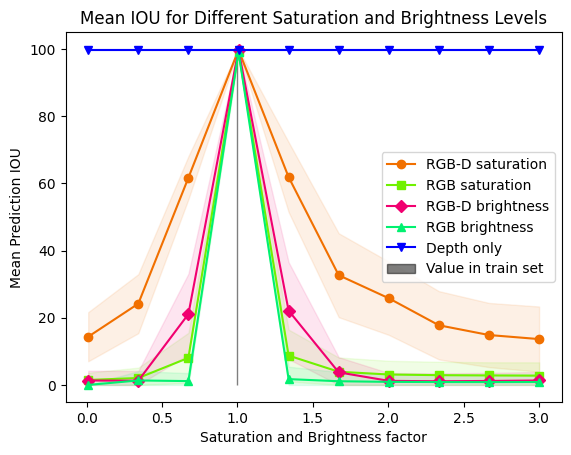

In [8]:
# Plot the no variation results

saturation_and_brightness_range = np.linspace(0.01, 3.0, 10)
hue_range = np.linspace(-0.5, 0.5, 11)
markers = ['-o', '-s', '-D', '-^', '-v', '-<', '->', '-p', '-h', '-H', '-d']
colors = ['#FF69B4', 'green', 'blue']
rgb_colors = ['#70F100', '#00F170', '#0070F1']
rgbd_colors = ['#F17000', '#F10070', '#00F170']

print(len(hue_miou_rgbd_DFormer_tiny))

plt.plot(saturation_and_brightness_range, saturation_miou_rgbd_DFormer_tiny, markers[0], label='RGB-D saturation', color=rgbd_colors[0])
plt.plot(saturation_and_brightness_range, saturation_miou_rgb_DFormer_tiny, markers[1], label='RGB saturation', color=rgb_colors[0])
plt.plot(saturation_and_brightness_range, brightness_miou_rgbd_DFormer_tiny, markers[2], label='RGB-D brightness', color=rgbd_colors[1])
plt.plot(saturation_and_brightness_range, brightness_miou_rgb_DFormer_tiny, markers[3], label='RGB brightness', color=rgb_colors[1])

plt.plot(saturation_and_brightness_range, np.repeat(miou_depth_DFormer_tiny, len(saturation_miou_rgbd_DFormer_tiny)), markers[4], label='Depth only', color=depth_colors[0])

# num_values = len(saturation_and_brightness_range)
# data_in_train_x_positions = np.array([1.0])
# data_in_train_x_positions = (data_in_train_x_positions - 0.01) / (3.0 - 0.01) * (num_values - 1)
# print(data_in_train_x_positions)
# plt.fill_between(
#     [data_in_train_x_positions[0], data_in_train_x_positions[0]],
#     0, 100,
#     color='blue', alpha=0.5, label='default value in training set')

plt.fill_between(
    [1, 1],
    0, 100,
    color='black', alpha=0.5, label='Value in train set')

plt.fill_between(
    saturation_and_brightness_range,
    np.maximum(np.array(saturation_miou_rgbd_DFormer_tiny) - np.array(saturation_std_rgbd_DFormer_tiny), 0),
    np.minimum(np.array(saturation_miou_rgbd_DFormer_tiny) + np.array(saturation_std_rgbd_DFormer_tiny), 100),
    color=rgbd_colors[0], alpha=0.1)

plt.fill_between(
    saturation_and_brightness_range,
    np.maximum(np.array(saturation_miou_rgb_DFormer_tiny) - np.array(saturation_std_rgb_DFormer_tiny), 0),
    np.minimum(np.array(saturation_miou_rgb_DFormer_tiny) + np.array(saturation_std_rgb_DFormer_tiny), 100),
    color=rgb_colors[0], alpha=0.1)

plt.fill_between(
    saturation_and_brightness_range,
    np.maximum(np.array(brightness_miou_rgbd_DFormer_tiny) - np.array(brightness_iou_std_rgbd_DFormer_tiny), 0),
    np.minimum(np.array(brightness_miou_rgbd_DFormer_tiny) + np.array(brightness_iou_std_rgbd_DFormer_tiny), 100),
    color=rgbd_colors[1], alpha=0.1)

plt.fill_between(
    saturation_and_brightness_range,
    np.maximum(np.array(brightness_miou_rgb_DFormer_tiny) - np.array(brightness_iou_std_rgb_DFormer_tiny), 0),
    np.minimum(np.array(brightness_miou_rgb_DFormer_tiny) + np.array(brightness_iou_std_rgb_DFormer_tiny), 100),
    color=rgb_colors[1], alpha=0.1)

plt.fill_between(
    saturation_and_brightness_range,
    np.maximum(np.repeat(miou_depth_DFormer_tiny, len(saturation_miou_rgbd_DFormer_tiny)) - np.repeat(std_depth_DFormer_tiny, len(saturation_miou_rgbd_DFormer_tiny)), 0),
    np.minimum(np.repeat(miou_depth_DFormer_tiny, len(saturation_miou_rgbd_DFormer_tiny)) + np.repeat(std_depth_DFormer_tiny, len(saturation_miou_rgbd_DFormer_tiny)), 100),
    color=depth_colors[0], alpha=0.1)

plt.xlabel('Saturation and Brightness factor')
plt.ylabel('Mean Prediction IOU')
plt.title('Mean IOU for Different Saturation and Brightness Levels')
plt.legend()

plt.show()



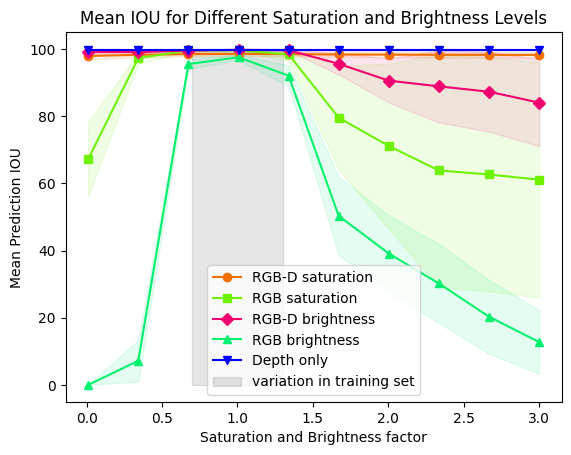

In [9]:
# Variation
plt.plot(saturation_and_brightness_range, saturation_miou_rgbd_DFormer_tiny_variation, markers[0], label='RGB-D saturation', color=rgbd_colors[0])
plt.plot(saturation_and_brightness_range, saturation_miou_rgb_DFormer_tiny_variation, markers[1], label='RGB saturation', color=rgb_colors[0])
plt.plot(saturation_and_brightness_range, brightness_miou_rgbd_DFormer_tiny_variation, markers[2], label='RGB-D brightness', color=rgbd_colors[1])
plt.plot(saturation_and_brightness_range, brightness_miou_rgb_DFormer_tiny_variation, markers[3], label='RGB brightness', color=rgb_colors[1])

plt.plot(saturation_and_brightness_range, np.repeat(miou_depth_DFormer_tiny, len(saturation_miou_rgbd_DFormer_tiny)), markers[4], label='Depth only', color=depth_colors[0])

data_in_train_x_positions_variation = np.array([0.7, 1.3])
plt.fill_between(
    [data_in_train_x_positions_variation[0], data_in_train_x_positions_variation[1]],
    0, 100,
    color='black', alpha=0.1, label='variation in training set')

plt.fill_between(
    saturation_and_brightness_range,
    np.maximum(np.array(saturation_miou_rgbd_DFormer_tiny_variation) - np.array(saturation_std_rgbd_DFormer_tiny_variation), 0),
    np.minimum(np.array(saturation_miou_rgbd_DFormer_tiny_variation) + np.array(saturation_std_rgbd_DFormer_tiny_variation), 100),
    color=rgbd_colors[0], alpha=0.1)

plt.fill_between(
    saturation_and_brightness_range,
    np.maximum(np.array(saturation_miou_rgb_DFormer_tiny_variation) - np.array(saturation_std_rgb_DFormer_tiny_variation), 0),
    np.minimum(np.array(saturation_miou_rgb_DFormer_tiny_variation) + np.array(saturation_std_rgb_DFormer_tiny_variation), 100),
    color=rgb_colors[0], alpha=0.1)

plt.fill_between(
    saturation_and_brightness_range,
    np.maximum(np.array(brightness_miou_rgbd_DFormer_tiny_variation) - np.array(brightness_iou_std_rgbd_DFormer_tiny_variation), 0),
    np.minimum(np.array(brightness_miou_rgbd_DFormer_tiny_variation) + np.array(brightness_iou_std_rgbd_DFormer_tiny_variation), 100),
    color=rgbd_colors[1], alpha=0.1)

plt.fill_between(
    saturation_and_brightness_range,
    np.maximum(np.array(brightness_miou_rgb_DFormer_tiny_variation) - np.array(brightness_iou_std_rgb_DFormer_tiny_variation), 0),
    np.minimum(np.array(brightness_miou_rgb_DFormer_tiny_variation) + np.array(brightness_iou_std_rgb_DFormer_tiny_variation), 100),
    color=rgb_colors[1], alpha=0.1)

plt.fill_between(
    saturation_and_brightness_range,
    np.maximum(np.repeat(miou_depth_DFormer_tiny, len(saturation_miou_rgbd_DFormer_tiny)) - np.repeat(std_depth_DFormer_tiny, len(saturation_miou_rgbd_DFormer_tiny)), 0),
    np.minimum(np.repeat(miou_depth_DFormer_tiny, len(saturation_miou_rgbd_DFormer_tiny)) + np.repeat(std_depth_DFormer_tiny, len(saturation_miou_rgbd_DFormer_tiny)), 100),
    color=depth_colors[0], alpha=0.1)

plt.xlabel('Saturation and Brightness factor')
plt.ylabel('Mean Prediction IOU')
plt.title('Mean IOU for Different Saturation and Brightness Levels')
plt.legend()

plt.show()

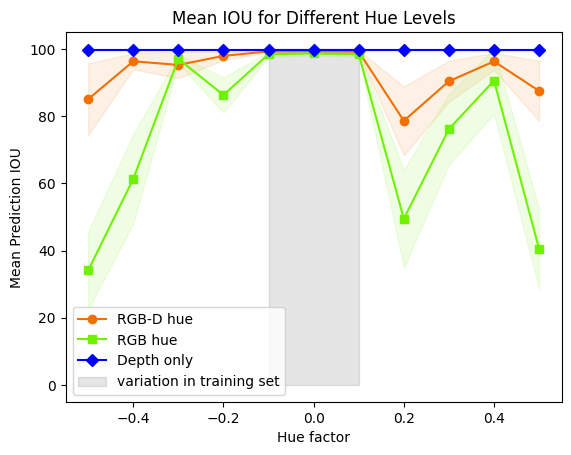

In [10]:
# Variation for hue
plt.plot(hue_range, hue_miou_rgbd_DFormer_tiny_variation, markers[0], label='RGB-D hue', color=rgbd_colors[0])
plt.plot(hue_range, hue_miou_rgb_DFormer_tiny_variation, markers[1], label='RGB hue', color=rgb_colors[0])

plt.plot(hue_range, np.repeat(miou_depth_DFormer_tiny, len(hue_miou_rgbd_DFormer_tiny_variation)), markers[2], label='Depth only', color=depth_colors[0])

data_in_train_x_positions_variation = np.array([-0.1, 0.1])
plt.fill_between(
    [data_in_train_x_positions_variation[0], data_in_train_x_positions_variation[1]],
    0, 100,
    color='black', alpha=0.1, label='variation in training set')

plt.fill_between(
    hue_range,
    np.maximum(np.array(hue_miou_rgbd_DFormer_tiny_variation) - np.array(hue_iou_std_rgbd_DFormer_tiny_variation), 0),
    np.minimum(np.array(hue_miou_rgbd_DFormer_tiny_variation) + np.array(hue_iou_std_rgbd_DFormer_tiny_variation), 100),
    color=rgbd_colors[0], alpha=0.1)

plt.fill_between(
    hue_range,
    np.maximum(np.array(hue_miou_rgb_DFormer_tiny_variation) - np.array(hue_iou_std_rgb_DFormer_tiny_variation), 0),
    np.minimum(np.array(hue_miou_rgb_DFormer_tiny_variation) + np.array(hue_iou_std_rgb_DFormer_tiny_variation), 100),
    color=rgb_colors[0], alpha=0.1)

plt.fill_between(
    hue_range,
    np.maximum(np.repeat(miou_depth_DFormer_tiny, len(hue_miou_rgbd_DFormer_tiny_variation)) - np.repeat(std_depth_DFormer_tiny, len(hue_miou_rgbd_DFormer_tiny_variation)), 0),
    np.minimum(np.repeat(miou_depth_DFormer_tiny, len(hue_miou_rgbd_DFormer_tiny_variation)) + np.repeat(std_depth_DFormer_tiny, len(hue_miou_rgbd_DFormer_tiny_variation)), 100),
    color=depth_colors[0], alpha=0.1)

plt.xlabel('Hue factor')
plt.ylabel('Mean Prediction IOU')
plt.title('Mean IOU for Different Hue Levels')
plt.legend()

plt.show()

In [12]:
# Print all data as arrays:
print("Saturation range")
print(saturation_and_brightness_range)
print("Saturation RGB-D original")
print(saturation_miou_rgbd_DFormer_tiny)
print("Saturation RGB-D variation")
print(saturation_miou_rgbd_DFormer_tiny_variation)
print("Saturation RGB original")
print(saturation_miou_rgb_DFormer_tiny)
print("Saturation RGB variation")
print(saturation_miou_rgb_DFormer_tiny_variation)

print("Brightness range")
print(saturation_and_brightness_range)
print("Brightness RGB-D original")
print(brightness_miou_rgbd_DFormer_tiny)
print("Brightness RGB-D variation")
print(brightness_miou_rgbd_DFormer_tiny_variation)
print("Brightness RGB original")
print(brightness_miou_rgb_DFormer_tiny)
print("Brightness RGB variation")
print(brightness_miou_rgb_DFormer_tiny_variation)

print("Hue range")
print(hue_range)
print("Hue RGB-D original")
print(hue_miou_rgbd_DFormer_tiny)
print("Hue RGB-D variation")
print(hue_miou_rgbd_DFormer_tiny_variation)
print("Hue RGB original")
print(hue_miou_rgb_DFormer_tiny)
print("Hue RGB variation")
print(hue_miou_rgb_DFormer_tiny_variation)
print("Depth")
print(miou_depth_DFormer_tiny)


Saturation range
[0.01       0.34222222 0.67444444 1.00666667 1.33888889 1.67111111
 2.00333333 2.33555556 2.66777778 3.        ]
Saturation RGB-D original
[14.34 24.18 61.66 99.71 61.86 32.65 25.79 17.75 14.85 13.64]
Saturation RGB-D variation
[97.91 98.24 98.45 98.53 98.46 98.34 98.3  98.25 98.23 98.22]
Saturation RGB original
[ 1.47  2.06  8.05 99.19  8.73  3.92  3.1   2.9   2.82  2.75]
Saturation RGB variation
[67.19 97.26 99.57 99.6  98.37 79.54 71.1  63.83 62.63 61.09]
Brightness range
[0.01       0.34222222 0.67444444 1.00666667 1.33888889 1.67111111
 2.00333333 2.33555556 2.66777778 3.        ]
Brightness RGB-D original
[ 1.31  1.25 21.08 99.71 22.11  3.74  1.21  1.09  1.18  1.32]
Brightness RGB-D variation
[99.15 99.05 99.53 99.73 99.62 95.57 90.56 88.86 87.27 84.02]
Brightness RGB original
[ 0.    1.33  1.14 99.14  1.73  1.1   0.91  0.85  0.84  0.86]
Brightness RGB variation
[ 0.    7.19 95.5  97.52 92.04 50.3  39.11 30.19 20.3  12.77]
Hue range
[-0.5 -0.4 -0.3 -0.2 -0.1  0. 

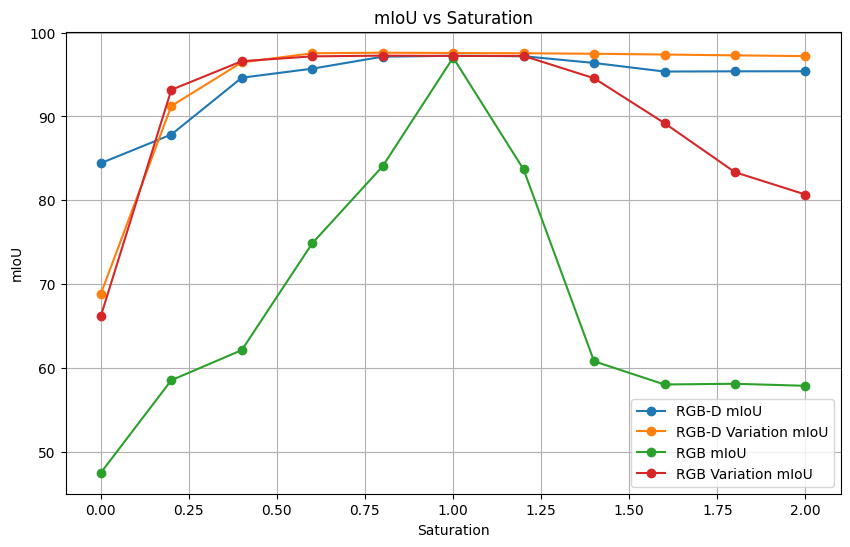

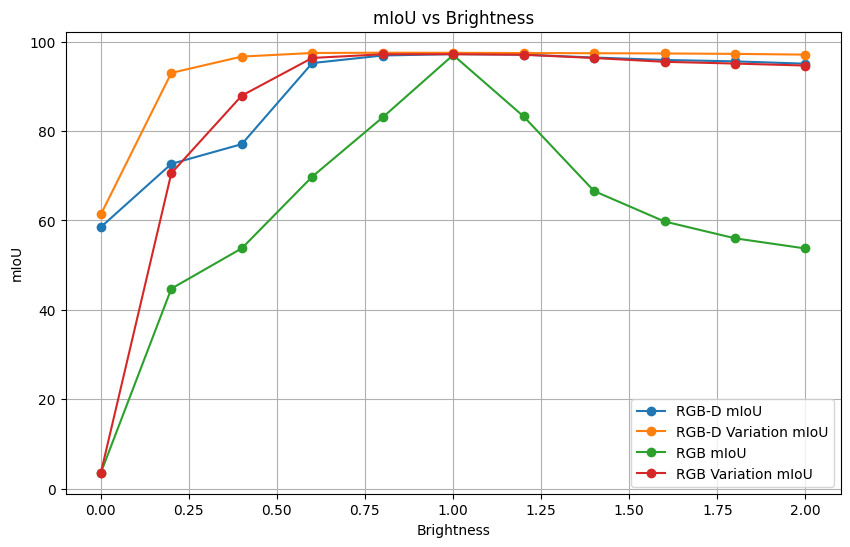

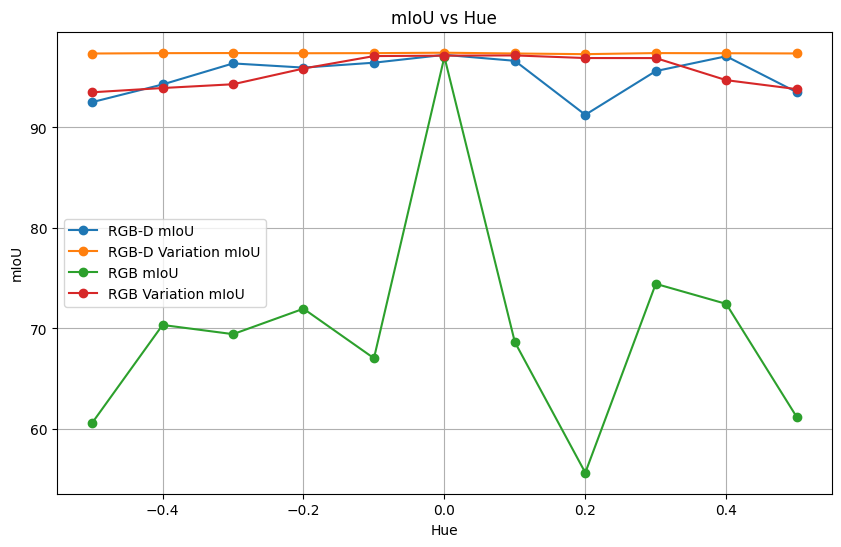

In [1]:
import matplotlib.pyplot as plt

# Data for Saturation
saturation_values = [0.001, 0.2009, 0.4008, 0.6007, 0.8006, 1.0005, 1.2004, 1.4003, 1.6002, 1.8001, 2.0]
rgbd_miou_saturation = [84.434, 87.843, 94.613, 95.693, 97.121, 97.233, 97.174, 96.373, 95.349, 95.376, 95.383]
rgbd_var_miou_saturation = [68.869, 91.242, 96.446, 97.528, 97.593, 97.562, 97.531, 97.468, 97.377, 97.278, 97.187]
rgb_miou_saturation = [47.535, 58.56, 62.148, 74.874, 84.068, 97.01, 83.681, 60.818, 58.051, 58.138, 57.894]
rgb_var_miou_saturation = [66.228, 93.174, 96.584, 97.16, 97.245, 97.213, 97.213, 94.553, 89.201, 83.353, 80.694]

# Data for Brightness
brightness_values = [0.001, 0.2009, 0.4008, 0.6007, 0.8006, 1.0005, 1.2004, 1.4003, 1.6002, 1.8001, 2.0]
rgbd_miou_brightness = [58.519, 72.662, 77.079, 95.218, 96.908, 97.22, 97.091, 96.456, 95.91, 95.599, 95.073]
rgbd_var_miou_brightness = [61.358, 93.013, 96.672, 97.47, 97.531, 97.518, 97.455, 97.42, 97.366, 97.273, 97.104]
rgb_miou_brightness = [3.557, 44.743, 53.768, 69.8, 83.068, 97.014, 83.274, 66.583, 59.771, 56.008, 53.732]
rgb_var_miou_brightness = [3.557, 70.576, 87.933, 96.364, 97.178, 97.205, 97.084, 96.347, 95.497, 95.105, 94.659]

# Data for Hue
hue_values = [-0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
rgbd_miou_hue = [92.519, 94.279, 96.373, 95.958, 96.445, 97.227, 96.633, 91.259, 95.611, 97.085, 93.516]
rgbd_var_miou_hue = [97.359, 97.395, 97.406, 97.387, 97.396, 97.438, 97.362, 97.295, 97.402, 97.387, 97.366]
rgb_miou_hue = [60.591, 70.343, 69.429, 71.96, 67.03, 97.023, 68.638, 55.638, 74.437, 72.442, 61.191]
rgb_var_miou_hue = [93.5, 93.925, 94.3, 95.864, 97.104, 97.148, 97.169, 96.909, 96.905, 94.708, 93.817]

# Plot function
def plot_property(values, rgbd, rgbd_var, rgb, rgb_var, title, xlabel):
    plt.figure(figsize=(10, 6))
    plt.plot(values, rgbd, label='RGB-D mIoU', marker='o')
    plt.plot(values, rgbd_var, label='RGB-D Variation mIoU', marker='o')
    plt.plot(values, rgb, label='RGB mIoU', marker='o')
    plt.plot(values, rgb_var, label='RGB Variation mIoU', marker='o')
    plt.xlabel(xlabel)
    plt.ylabel('mIoU')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot each property
plot_property(saturation_values, rgbd_miou_saturation, rgbd_var_miou_saturation, rgb_miou_saturation, rgb_var_miou_saturation, 'mIoU vs Saturation', 'Saturation')
plot_property(brightness_values, rgbd_miou_brightness, rgbd_var_miou_brightness, rgb_miou_brightness, rgb_var_miou_brightness, 'mIoU vs Brightness', 'Brightness')
plot_property(hue_values, rgbd_miou_hue, rgbd_var_miou_hue, rgb_miou_hue, rgb_var_miou_hue, 'mIoU vs Hue', 'Hue')

